In [100]:
numbers_to_remove = [79, 80, 81]
# adding columns for which there are NaNs in SARIMA
numbers_to_remove += [1, 4, 15, 16, 17, 18, 26, 28, 29, 40, 42, 47, 54, 59, 67, 71, 77]


In [101]:
import pandas as pd
import glob
from utils import ends_with_number

# Define the folder where the CSV files are located
folder_path = r'D:\AGH\bankomaty_2022\data\redatyprognoz'

# Use glob to find all CSV files in the folder
file_pattern = folder_path + r'\prognozy_W_*.csv'
file_list = glob.glob(file_pattern)

# Create an empty list to hold the DataFrames
df_list = []

# Loop over each file and read it into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    period_id = df['date'].min()
    df['periodID'] = period_id
    df_list.append(df)

# Concatenate the DataFrames into a single DataFrame
xgb_raw_df = pd.concat(df_list)

# Get a list of column names to keep
columns_to_keep = [column for column in xgb_raw_df.columns if not ends_with_number(column, ['{:02d}'.format(num) for num in numbers_to_remove])]

# Remove the columns from the data frame
xgb_raw_df = xgb_raw_df[columns_to_keep]

In [102]:
import os


# Define the directory where the Excel files are stored
directory = "D:/AGH/bankomaty_2022/data/Wielkość wypłat"

# Get a list of all Excel files in the directory
excel_files = [f for f in os.listdir(directory) if f.endswith(".xlsx")]

# Create an empty list to store the data frames
data_frames = []

# Loop through each Excel file and load the "prediction errors" sheet
for i, excel_file in enumerate(excel_files):
    file_path = os.path.join(directory, excel_file)
    xl = pd.ExcelFile(file_path)
    sheet_name = "prediction errors"
    df = xl.parse(sheet_name)
    period_id = os.path.splitext(excel_file)[0]
    df['periodID'] = period_id
    data_frames.append(df)

# Combine all data frames into a single data frame
sarima_raw_df = pd.concat(data_frames)

# Get a list of column names to keep
columns_to_keep = [column for column in sarima_raw_df.columns if not ends_with_number(column, ['{:02d}'.format(num) for num in numbers_to_remove])]

# Remove the columns from the data frame
sarima_raw_df = sarima_raw_df[columns_to_keep]

In [103]:
import pandas as pd

# Define the file path of the Excel file
file_path = r'D:\AGH\bankomaty_2022\data\replaced 17-12-2022.xlsx'

# Read all sheets with names ending in "_errors" into a list of data frames
df_list = []
xl = pd.ExcelFile(file_path)
for sheet_name in xl.sheet_names:
    if sheet_name.endswith("_errors"):
        df = xl.parse(sheet_name)
        period_id = sheet_name[:-7]
        day, month, year = period_id.split("_")
        new_period_id = f"{year}_{month}_{day}"
        df['periodID'] = new_period_id
        df_list.append(df)

# Concatenate the data frames into a single data frame
bayes_raw_df = pd.concat(df_list)

# Rename the "Unnamed" column to "name"
bayes_raw_df = bayes_raw_df.rename(columns={"Unnamed: 0": "name"})

# Remove columns with names starting with 'ATM_N_'
bayes_raw_df = bayes_raw_df.loc[:, ~bayes_raw_df.columns.str.startswith('ATM_N_')]

# Print the resulting data frame
bayes_raw_df

# Get a list of column names to keep
columns_to_keep = [column for column in bayes_raw_df.columns if not ends_with_number(column, ['{:02d}'.format(num) for num in numbers_to_remove])]

# Remove the columns from the data frame
bayes_raw_df = bayes_raw_df[columns_to_keep]

In [104]:
import pandas as pd

# Assuming bayes_raw_df is your original DataFrame

# Keep only rows with column name 'MAPE' or 'SMAPE'
bayes_filtered_df = bayes_raw_df[bayes_raw_df['name'].isin(['MAPE', 'SMAPE'])]


# Convert 'periodID' column from string to datetime format
bayes_filtered_df['periodID'] = pd.to_datetime(bayes_filtered_df['periodID'], format='%Y_%m_%d')

# Remove the rows with '26.04.2019' and '26.04.2020'
bayes_filtered_df = bayes_filtered_df[(bayes_filtered_df['periodID'] != '2019-01-18') & (bayes_filtered_df['periodID'] != '2020-01-18') & (bayes_filtered_df['periodID'] != '2021-01-18')]


bayes_filtered_df['model'] = 'BVAR'
# Reset index
bayes_filtered_df.reset_index(drop=True, inplace=True)

unique_period_ids = bayes_filtered_df['periodID'].unique()

# Sort the unique dates
sorted_unique_dates = sorted(unique_period_ids)

# Create a dictionary mapping the sorted unique dates to their rank
date_rank_mapping = {date: rank + 1 for rank, date in enumerate(sorted_unique_dates)}

# Apply the mapping to the 'periodID' column
bayes_filtered_df['periodID'] = bayes_filtered_df['periodID'].map(date_rank_mapping)

bayes_filtered_df

C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\1480528512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes_filtered_df['periodID'] = pd.to_datetime(bayes_filtered_df['periodID'], format='%Y_%m_%d')


,name,ATM_W_02,ATM_W_03,ATM_W_05,ATM_W_06,ATM_W_07,ATM_W_08,ATM_W_09,ATM_W_10,ATM_W_11,...,ATM_W_69,ATM_W_70,ATM_W_72,ATM_W_73,ATM_W_74,ATM_W_75,ATM_W_76,ATM_W_78,periodID,model
0,MAPE,29.669919,31.952356,133.915694,13.001428,21.490123,38.380471,45.996146,70.180566,51.198251,...,53.894261,65.113489,92.008048,40.468229,37.655503,52.706784,101.816594,322.936415,3,BVAR
1,SMAPE,24.846398,25.224782,47.070133,13.652408,25.281150,31.798228,36.368337,50.285268,38.382466,...,33.693637,36.632207,48.901809,30.352551,39.391832,39.130533,43.522166,45.582343,3,BVAR
2,MAPE,28.600253,23.709692,70.830533,55.511041,89.661060,34.086106,64.549864,78.007708,123.521030,...,147.849797,136.828270,166.625447,72.052286,464.808398,49.583534,94.089270,93.774249,7,BVAR
3,SMAPE,25.145139,20.324479,41.679541,39.540783,53.725035,23.578845,37.256216,48.288158,51.139584,...,49.711511,56.739298,50.790927,39.568137,97.999428,33.834214,48.482185,42.396944,7,BVAR
4,MAPE,66.880666,66.575854,66.498484,167.322406,69.204463,63.193082,69.850373,85.211734,73.837392,...,81.320313,61.634065,59.945948,69.284511,63.939568,71.946790,76.543929,111.405233,1,BVAR
5,SMAPE,117.863429,117.752304,118.817436,127.712236,125.674065,114.564292,123.226821,123.772883,126.366889,...,133.375238,113.504915,111.341442,122.173155,118.406637,118.260534,118.644560,131.678193,1,BVAR
6,MAPE,47.214402,50.302521,42.233731,93.989946,640.683318,64.552962,35.398230,284.084165,23.232712,...,75.097576,83.649530,83.158952,43.795904,1819.542906,42.014059,42.762923,126.805864,5,BVAR
7,SMAPE,48.861452,36.007668,31.711098,66.921587,73.782776,64.450776,41.693723,89.895779,23.012819,...,62.757104,55.389503,69.033671,46.460859,170.865311,42.089781,39.514285,75.533789,5,BVAR
8,MAPE,28.854479,34.757585,40.107569,11.070062,22.943417,30.539185,49.684882,177.544740,31.077509,...,50.174027,49.242288,66.794997,41.374442,36.652049,22.468485,97.559206,84.405761,2,BVAR
9,SMAPE,25.074367,23.596440,31.948403,10.845242,21.249166,25.389784,33.956316,58.435056,27.333512,...,33.820495,33.249714,41.736116,32.067151,34.563825,19.912215,47.859078,36.949168,2,BVAR


In [105]:
bayes_raw_df['periodID'].unique()

array(['2019_01_18', '2020_01_18', '2019_10_11', '2020_10_11',
       '2019_04_26', '2020_04_26', '2019_08_01', '2020_08_01',
       '2019_12_15', '2020_12_15'], dtype=object)

In [106]:
bayes_filtered_df['periodID'].unique()

array([3, 7, 1, 5, 2, 6, 4, 8], dtype=int64)

In [107]:
xgb_raw_df['periodID'].unique()

array(['2019-04-26', '2019-08-01', '2019-10-11', '2019-12-15',
       '2020-01-18', '2020-04-26', '2020-08-01', '2020-10-11',
       '2020-12-15', '2021-01-18'], dtype=object)

In [108]:
import pandas as pd

# Assuming xgb_raw_df is your original DataFrame

# Keep only rows with column 'date' containing 'MAPE' or 'SMAPE'
xgb_filtered_df = xgb_raw_df[xgb_raw_df['date'].isin(['MAPE', 'SMAPE'])]

# Convert 'periodID' column from string to datetime format
xgb_filtered_df['periodID'] = pd.to_datetime(xgb_filtered_df['periodID'], format='%Y-%m-%d')

# Remove the rows with '26.04.2019' and '26.04.2020'
xgb_filtered_df = xgb_filtered_df[(xgb_filtered_df['periodID'] != '2020-01-18') & (xgb_filtered_df['periodID'] != '2019-01-18') & (xgb_filtered_df['periodID'] != '2021-01-18')]

# Reset index
xgb_filtered_df.reset_index(drop=True, inplace=True)

# Change column name 'date' to 'name'
xgb_filtered_df.rename(columns={'date': 'name'}, inplace=True)

# Get all column names starting with 'ATM_W_'
atm_columns = [col for col in xgb_filtered_df.columns if col.startswith('ATM_W_')]
xgb_filtered_df['model'] = 'XGB'

# Multiply all columns with the format 'ATM_W_XX' by 100
xgb_filtered_df[atm_columns] = xgb_filtered_df[atm_columns] * 100

unique_period_ids = xgb_filtered_df['periodID'].unique()

# Sort the unique dates
sorted_unique_dates = sorted(unique_period_ids)

# Create a dictionary mapping the sorted unique dates to their rank
date_rank_mapping = {date: rank + 1 for rank, date in enumerate(sorted_unique_dates)}

# Apply the mapping to the 'periodID' column
xgb_filtered_df['periodID'] = xgb_filtered_df['periodID'].map(date_rank_mapping)

xgb_filtered_df

C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\4138767522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_filtered_df['periodID'] = pd.to_datetime(xgb_filtered_df['periodID'], format='%Y-%m-%d')


,name,ATM_W_02,pred_W_02,ATM_W_03,pred_W_03,ATM_W_05,pred_W_05,ATM_W_06,pred_W_06,ATM_W_07,...,ATM_W_74,pred_W_74,ATM_W_75,pred_W_75,ATM_W_76,pred_W_76,ATM_W_78,pred_W_78,periodID,model
0,MAPE,24.680787,0.246808,23.673996,0.236740,25.990377,0.259904,73.035037,0.730350,30.113689,...,37.344082,0.373441,45.428999,0.454290,34.419063,0.344191,140.723391,1.407234,1,XGB
1,SMAPE,27.620947,0.276209,24.313164,0.243132,31.034558,0.310346,48.930189,0.489302,32.312938,...,38.863418,0.388634,40.642892,0.406429,34.234714,0.342347,54.399073,0.543991,1,XGB
2,MAPE,22.867369,0.228674,15.377975,0.153780,20.183862,0.201839,14.614259,0.146143,16.870068,...,32.296379,0.322964,24.725571,0.247256,48.737992,0.487380,28.495580,0.284956,2,XGB
3,SMAPE,21.717247,0.217172,15.796599,0.157966,20.954948,0.209549,14.440730,0.144407,19.492392,...,25.895375,0.258954,26.139834,0.261398,41.067903,0.410679,33.188935,0.331889,2,XGB
4,MAPE,16.156016,0.161560,24.821230,0.248212,80.435847,0.804358,17.255451,0.172555,18.357816,...,38.556827,0.385568,24.017364,0.240174,35.353945,0.353539,46.219732,0.462197,3,XGB
5,SMAPE,16.381737,0.163817,24.216516,0.242165,35.934765,0.359348,17.838796,0.178388,19.345367,...,35.349742,0.353497,23.642754,0.236428,29.080701,0.290807,38.037142,0.380371,3,XGB
6,MAPE,44.583180,0.445832,31.402356,0.314024,29.131355,0.291314,53.729545,0.537295,31.118695,...,36.613830,0.366138,109.199112,1.091991,92.656612,0.926566,29.433619,0.294336,4,XGB
7,SMAPE,33.505887,0.335059,26.122654,0.261227,26.943258,0.269433,30.266101,0.302661,30.549870,...,37.201255,0.372013,41.188511,0.411885,38.115233,0.381152,28.657547,0.286575,4,XGB
8,MAPE,26.623395,0.266234,29.240701,0.292407,28.708064,0.287081,54.430166,0.544302,459.952160,...,326.856439,3.268564,30.605864,0.306059,16.817642,0.168176,115.656962,1.156570,5,XGB
9,SMAPE,31.616721,0.316167,25.698014,0.256980,26.634206,0.266342,43.985047,0.439850,55.893287,...,71.173461,0.711735,26.932916,0.269329,19.551379,0.195514,48.490849,0.484908,5,XGB


In [109]:
xgb_filtered_df['periodID'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [110]:
import pandas as pd
import re

# Assuming sarima_raw_df is your original DataFrame

# Keep only rows with column 'name' containing 'MAPE' or 'SMAPE'
sarima_filtered_df = sarima_raw_df[sarima_raw_df['name'].isin(['MAPE', 'SMAPE'])]

# Extract date from 'periodID' column
sarima_filtered_df['periodID'] = sarima_filtered_df['periodID'].apply(lambda x: x[6:16])

# Convert 'periodID' column from string to datetime format
sarima_filtered_df['periodID'] = pd.to_datetime(sarima_filtered_df['periodID'], format='%Y-%m-%d')

# Remove the rows with '26.04.2019' and '26.04.2020'
sarima_filtered_df = sarima_filtered_df[(sarima_filtered_df['periodID'] != '2018-08-01') & (sarima_filtered_df['periodID'] != '2019-08-01')]

sarima_filtered_df['model'] = 'SARIMA'
# Reset index
sarima_filtered_df.reset_index(drop=True, inplace=True)
unique_period_ids = sarima_filtered_df['periodID'].unique()

# Sort the unique dates
sorted_unique_dates = sorted(unique_period_ids)

# Create a dictionary mapping the sorted unique dates to their rank
date_rank_mapping = {date: rank + 1 for rank, date in enumerate(sorted_unique_dates)}

# Apply the mapping to the 'periodID' column
sarima_filtered_df['periodID'] = sarima_filtered_df['periodID'].map(date_rank_mapping)
sarima_filtered_df

C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\1747379609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarima_filtered_df['periodID'] = sarima_filtered_df['periodID'].apply(lambda x: x[6:16])
C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\1747379609.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarima_filtered_df['periodID'] = pd.to_datetime(sarima_filtered_df['periodID'], format='%Y-%m-%d')


,name,ATM_W_02,ATM_W_03,ATM_W_05,ATM_W_06,ATM_W_07,ATM_W_08,ATM_W_09,ATM_W_10,ATM_W_11,...,ATM_W_69,ATM_W_70,ATM_W_72,ATM_W_73,ATM_W_74,ATM_W_75,ATM_W_76,ATM_W_78,periodID,model
0,MAPE,30.327440,57.326542,53.146500,81.120299,42.093687,37.871196,21.941163,49.682567,28.544329,...,60.352313,36.824405,27.044688,28.725997,45.341689,56.645856,37.341766,38.398722,1,SARIMA
1,SMAPE,26.571497,32.198466,33.597052,54.719430,49.006509,30.219885,25.438942,40.536247,26.723981,...,43.563274,31.426013,24.943248,32.038841,61.638210,37.190436,30.623561,36.181096,1,SARIMA
2,MAPE,21.263423,24.144733,85.247597,11.098460,16.629798,17.075784,45.299406,32.192345,35.594073,...,23.408864,29.280994,28.526351,25.219239,29.901732,31.681241,48.691915,52.525618,2,SARIMA
3,SMAPE,20.033484,22.996776,31.053558,12.427758,18.027433,16.077592,37.334824,31.140455,28.788259,...,25.880199,24.051670,25.129224,20.876109,29.646966,26.142064,37.213618,38.447755,2,SARIMA
4,MAPE,48.695817,45.980341,47.266527,68.499424,28.138854,52.647844,64.706311,80.402307,79.801699,...,44.142638,61.456590,45.105410,67.768156,41.118750,149.343013,107.985819,46.744077,3,SARIMA
5,SMAPE,37.078782,35.435050,35.825521,38.594911,25.895461,45.119334,39.344640,48.589287,43.372758,...,40.182217,35.820889,33.836876,43.196813,33.649445,45.164813,44.834690,31.420256,3,SARIMA
6,MAPE,18.530019,20.300246,20.858423,26.299031,23.106764,26.184362,36.075792,33.231826,18.884650,...,43.960949,36.474158,22.286148,31.047348,24.005245,32.069689,20.058008,47.185366,4,SARIMA
7,SMAPE,20.349419,20.496407,19.751363,28.794232,22.772805,27.476051,39.746929,40.117925,17.300055,...,39.267619,45.460748,27.866057,36.832624,21.825396,27.691302,21.823488,40.657592,4,SARIMA
8,MAPE,26.558920,32.219857,30.789947,64.671544,206.406140,61.201339,42.902373,103.267316,15.641029,...,55.364438,47.599254,47.478986,43.554037,97.195635,39.668698,28.863481,119.044487,5,SARIMA
9,SMAPE,35.000434,27.264430,30.624030,67.462894,75.886592,91.201171,59.080184,55.818401,16.691116,...,59.397209,40.481133,67.231939,54.574546,153.812582,53.589916,36.314931,112.625724,5,SARIMA


In [111]:
sarima_filtered_df['periodID'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [112]:
xgb_unique_dates = xgb_filtered_df['periodID'].unique()
bayes_unique_dates = bayes_filtered_df['periodID'].unique()
sarima_unique_dates = sarima_filtered_df['periodID'].unique()

xgb_unique_dates_sorted = sorted(xgb_unique_dates)
bayes_unique_dates_sorted = sorted(bayes_unique_dates)
sarima_unique_dates_sorted = sorted(sarima_unique_dates)

print("Sorted unique dates in XGB DataFrame:", xgb_unique_dates_sorted)
print("Sorted unique dates in Bayes DataFrame:", bayes_unique_dates_sorted)
print("Sorted unique dates in SARIMA DataFrame:", sarima_unique_dates_sorted)



Sorted unique dates in XGB DataFrame: [1, 2, 3, 4, 5, 6, 7, 8]
Sorted unique dates in Bayes DataFrame: [1, 2, 3, 4, 5, 6, 7, 8]
Sorted unique dates in SARIMA DataFrame: [1, 2, 3, 4, 5, 6, 7, 8]


In [113]:
# Concatenate the three DataFrames
concatenated_df = pd.concat([xgb_filtered_df, bayes_filtered_df, sarima_filtered_df], axis=0)

# Reset the index of the concatenated DataFrame
concatenated_df.reset_index(drop=True, inplace=True)

# Get a list of columns to drop
columns_to_drop = [col for col in concatenated_df.columns if col.startswith('pred_W_')]

# Drop the columns
concatenated_df = concatenated_df.drop(columns_to_drop, axis=1)

concatenated_df

,name,ATM_W_02,ATM_W_03,ATM_W_05,ATM_W_06,ATM_W_07,ATM_W_08,ATM_W_09,ATM_W_10,ATM_W_11,...,ATM_W_69,ATM_W_70,ATM_W_72,ATM_W_73,ATM_W_74,ATM_W_75,ATM_W_76,ATM_W_78,periodID,model
0,MAPE,24.680787,23.673996,25.990377,73.035037,30.113689,26.115286,31.384919,306.425418,16.564729,...,27.594327,31.426516,20.629759,29.966907,37.344082,45.428999,34.419063,140.723391,1,XGB
1,SMAPE,27.620947,24.313164,31.034558,48.930189,32.312938,29.486401,29.081045,40.082394,18.441557,...,27.946519,31.443710,22.603265,34.555096,38.863418,40.642892,34.234714,54.399073,1,XGB
2,MAPE,22.867369,15.377975,20.183862,14.614259,16.870068,26.440041,29.539315,82.943305,16.132756,...,31.700808,21.987072,37.286964,21.634517,32.296379,24.725571,48.737992,28.495580,2,XGB
3,SMAPE,21.717247,15.796599,20.954948,14.440730,19.492392,25.634314,30.145480,49.455654,18.374406,...,29.603632,22.702913,32.831507,22.457355,25.895375,26.139834,41.067903,33.188935,2,XGB
4,MAPE,16.156016,24.821230,80.435847,17.255451,18.357816,18.532779,28.478515,38.432823,28.400588,...,26.943512,21.928347,31.079226,17.928096,38.556827,24.017364,35.353945,46.219732,3,XGB
5,SMAPE,16.381737,24.216516,35.934765,17.838796,19.345367,18.074109,27.053104,36.263699,25.960276,...,25.199244,20.951048,27.296887,19.041202,35.349742,23.642754,29.080701,38.037142,3,XGB
6,MAPE,44.583180,31.402356,29.131355,53.729545,31.118695,34.903630,32.478864,44.746147,51.923706,...,42.753238,46.859832,40.939596,28.711594,36.613830,109.199112,92.656612,29.433619,4,XGB
7,SMAPE,33.505887,26.122654,26.943258,30.266101,30.549870,33.434797,29.336628,33.291406,36.882092,...,40.589329,36.705470,33.588726,26.509256,37.201255,41.188511,38.115233,28.657547,4,XGB
8,MAPE,26.623395,29.240701,28.708064,54.430166,459.952160,27.420887,35.477187,115.610109,21.290232,...,48.962857,38.910077,22.352272,35.527303,326.856439,30.605864,16.817642,115.656962,5,XGB
9,SMAPE,31.616721,25.698014,26.634206,43.985047,55.893287,28.883308,33.557870,57.160388,23.424075,...,36.055959,34.991533,23.732633,39.887425,71.173461,26.932916,19.551379,48.490849,5,XGB


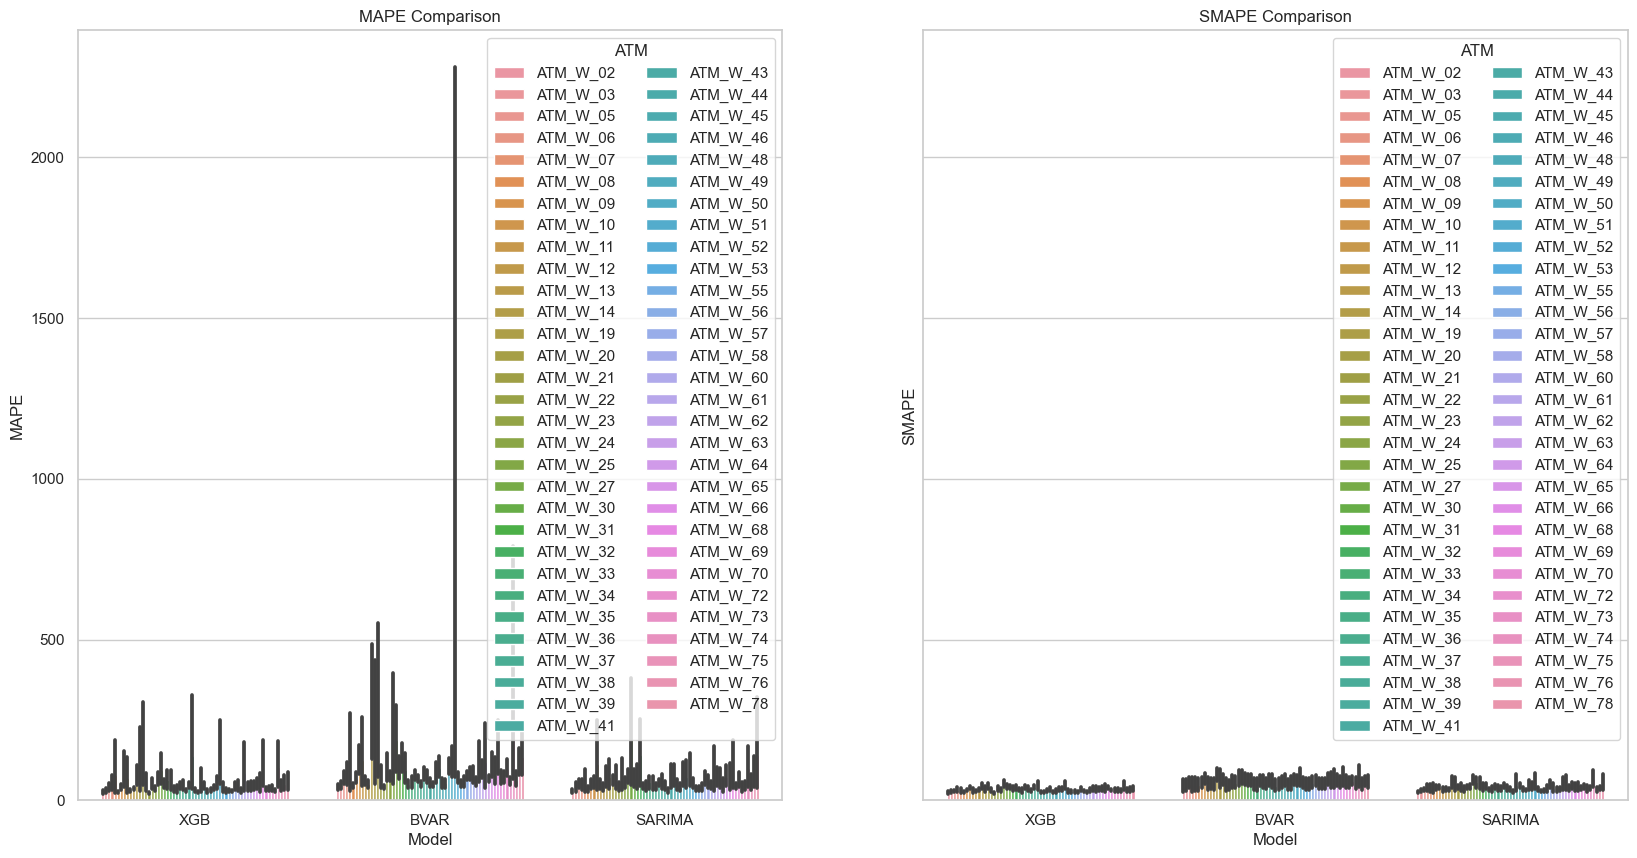

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter MAPE and SMAPE rows separately
mape_df = concatenated_df[concatenated_df['name'] == 'MAPE']
smape_df = concatenated_df[concatenated_df['name'] == 'SMAPE']

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plots for MAPE and SMAPE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# MAPE plot
sns.barplot(x="model", y="value", hue="ATM", data=mape_df.melt(id_vars=["model", "name", "periodID"], var_name="ATM", value_name="value"), ax=ax1)
ax1.set_title("MAPE Comparison")
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.legend(title="ATM", loc="upper right", ncol=2)

# SMAPE plot
sns.barplot(x="model", y="value", hue="ATM", data=smape_df.melt(id_vars=["model", "name", "periodID"], var_name="ATM", value_name="value"), ax=ax2)
ax2.set_title("SMAPE Comparison")
ax2.set_ylabel("SMAPE")
ax2.set_xlabel("Model")
ax2.legend(title="ATM", loc="upper right", ncol=2)

# Show the plot
plt.show()



C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\1000166988.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mape_mean = mape_df.groupby(['model', 'periodID']).mean()
C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\1000166988.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smape_mean = smape_df.groupby(['model', 'periodID']).mean()


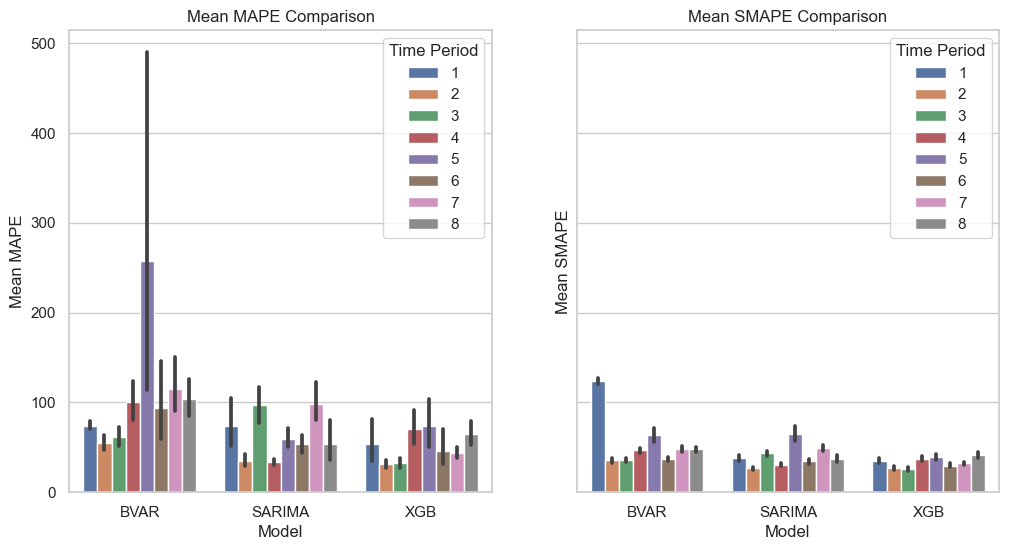

In [115]:
import numpy as np

# Calculate the mean MAPE and SMAPE for each model and time period
mape_mean = mape_df.groupby(['model', 'periodID']).mean()
smape_mean = smape_df.groupby(['model', 'periodID']).mean()

# Create bar plots for mean MAPE and SMAPE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# MAPE plot
sns.barplot(x="model", y="value", hue="periodID", data=mape_mean.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax1)
ax1.set_title("Mean MAPE Comparison")
ax1.set_ylabel("Mean MAPE")
ax1.set_xlabel("Model")
ax1.legend(title="Time Period", loc="upper right")

# SMAPE plot
sns.barplot(x="model", y="value", hue="periodID", data=smape_mean.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax2)
ax2.set_title("Mean SMAPE Comparison")
ax2.set_ylabel("Mean SMAPE")
ax2.set_xlabel("Model")
ax2.legend(title="Time Period", loc="upper right")

# Save the plot
plt.savefig(r'D:\AGH\bankomaty_2022\pics\mape_smape_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


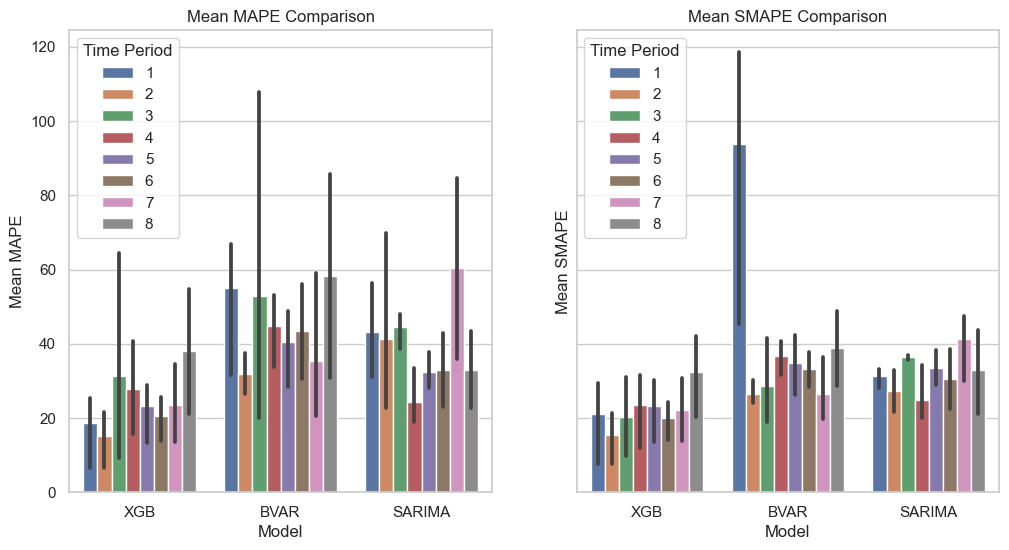

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of ATMs
atm_subset = ['ATM_W_02', 'ATM_W_03', 'ATM_W_05']

# Filter the dataframe
mape_subset = mape_df[atm_subset + ['model', 'periodID']]
smape_subset = smape_df[atm_subset + ['model', 'periodID']]

# Create bar plots for mean MAPE and SMAPE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# MAPE plot
sns.barplot(x="model", y="value", hue="periodID", data=mape_subset.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax1)
ax1.set_title("Mean MAPE Comparison")
ax1.set_ylabel("Mean MAPE")
ax1.set_xlabel("Model")
ax1.legend(title="Time Period", loc="upper left")

# SMAPE plot
sns.barplot(x="model", y="value", hue="periodID", data=smape_subset.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax2)
ax2.set_title("Mean SMAPE Comparison")
ax2.set_ylabel("Mean SMAPE")
ax2.set_xlabel("Model")
ax2.legend(title="Time Period", loc="upper left")


# Show the plot
plt.show()


In [117]:
has_nans = concatenated_df.isna().any().any()
print(has_nans)

False


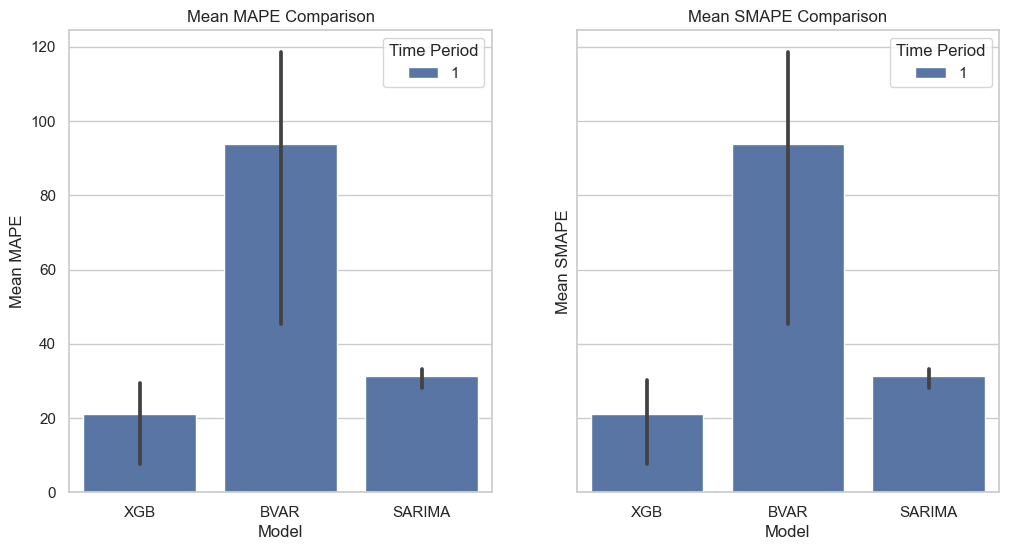

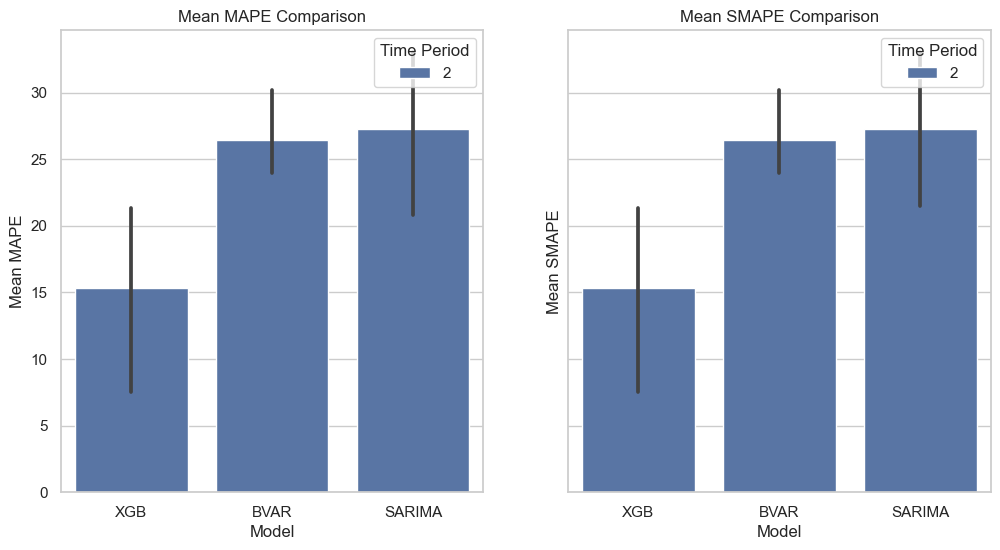

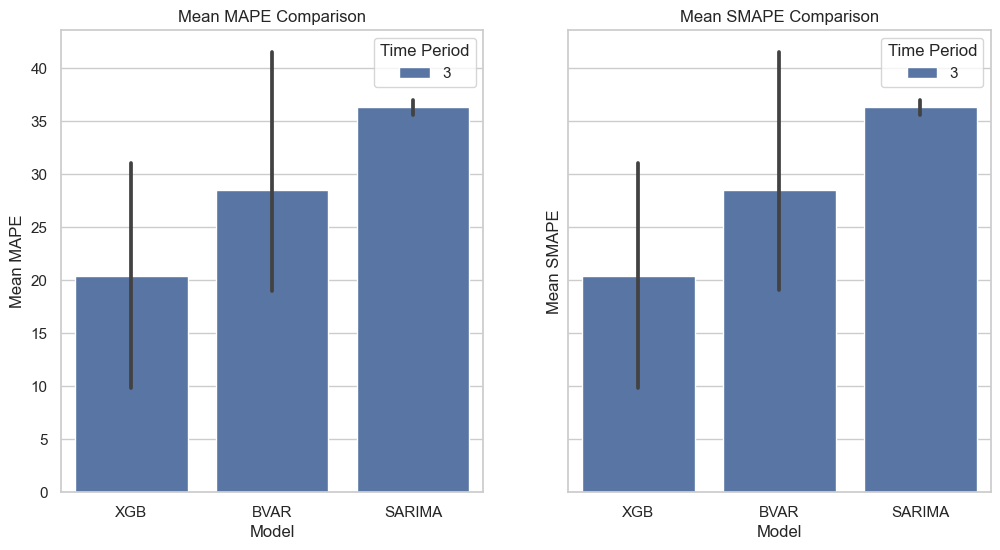

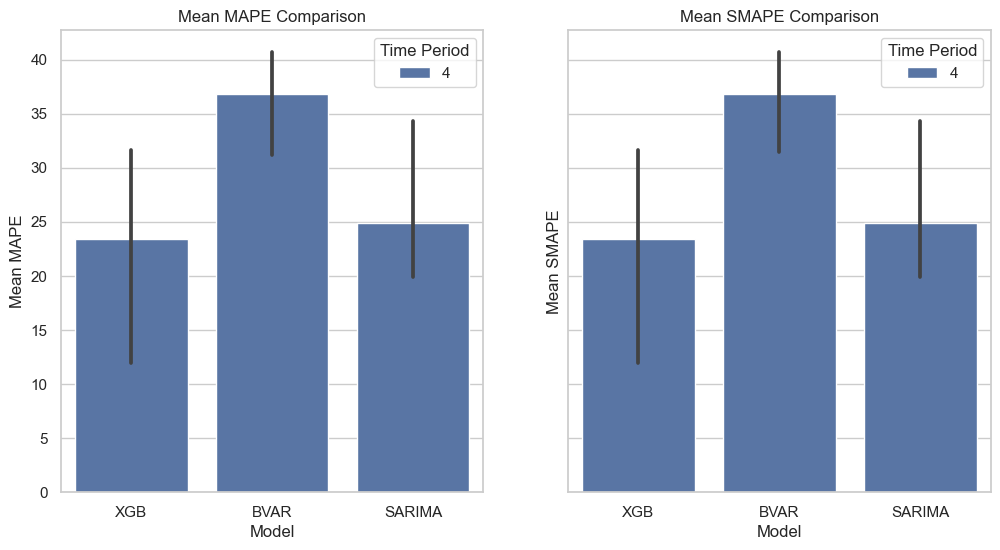

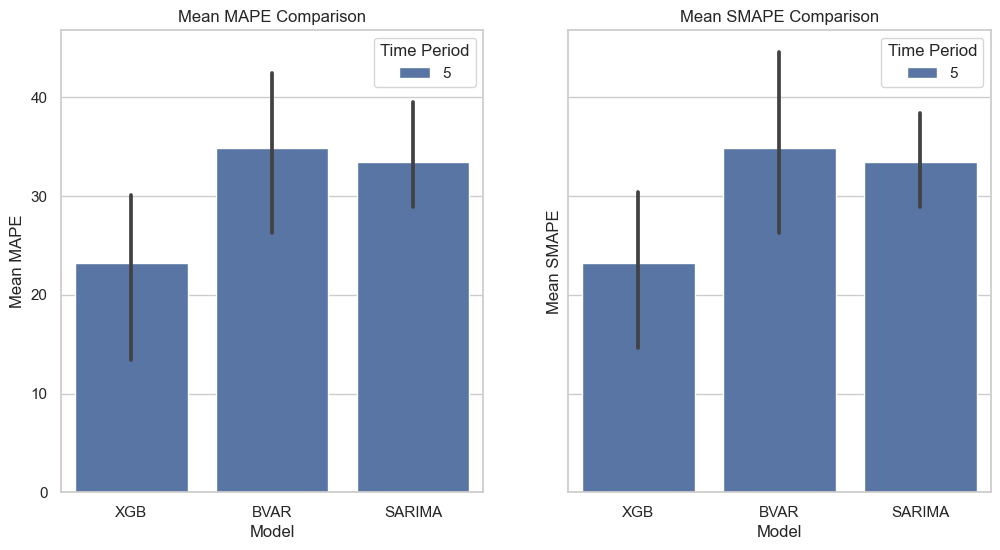

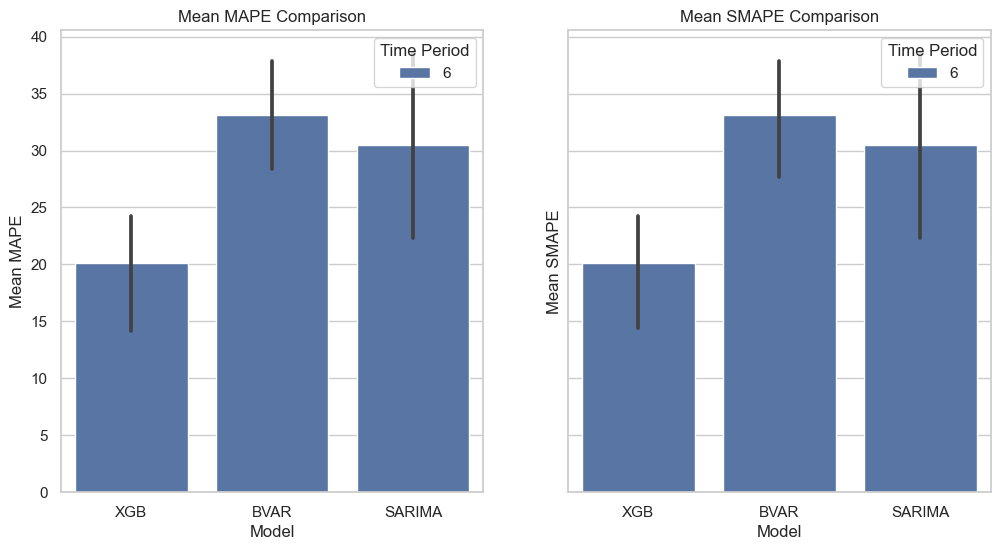

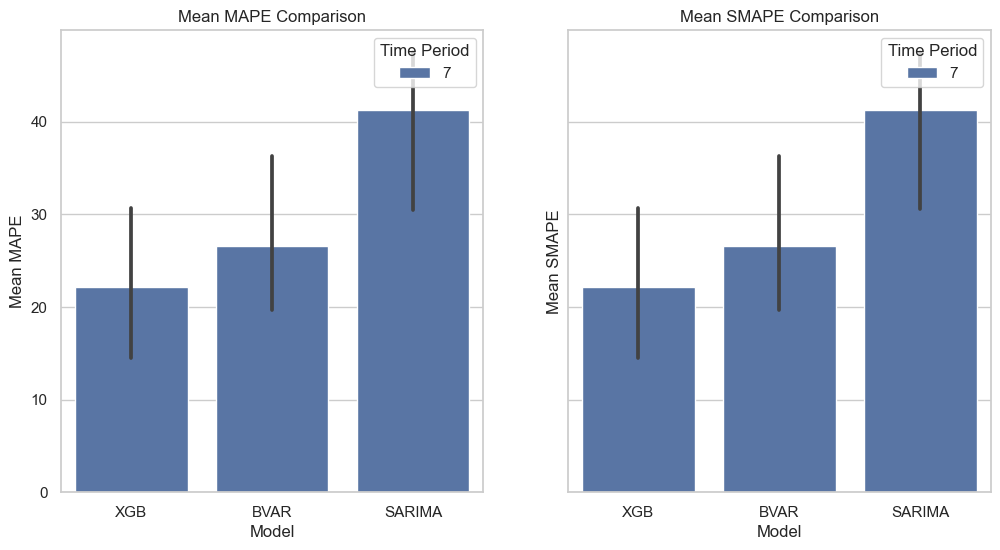

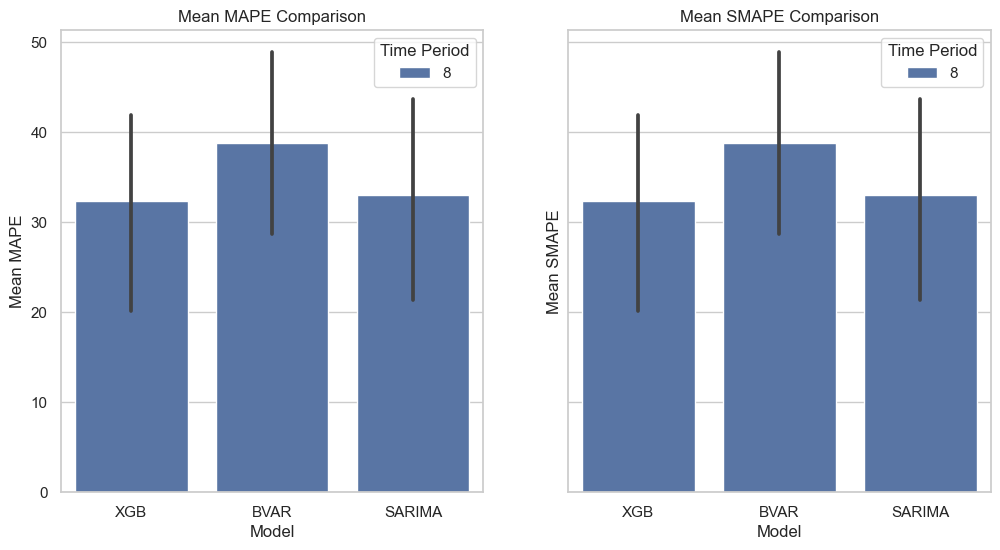

In [118]:
# Create a list of unique time periods
time_periods = concatenated_df["periodID"].unique()

# Loop through the time periods and create a bar chart for each one
for period in time_periods:
    # Filter the data for the current time period
    mape_period = mape_df[mape_df["periodID"] == period]
    smape_period = smape_df[smape_df["periodID"] == period]

    # Create bar plots for the current time period
    # (Use the same plotting code as before, but replace 'mape_df' with 'mape_period' and 'smape_df' with 'smape_period')
    # Filter the dataframe
    mape_subset = smape_period[atm_subset + ['model', 'periodID']]
    smape_subset = smape_period[atm_subset + ['model', 'periodID']]

    # Create bar plots for mean MAPE and SMAPE
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # MAPE plot
    sns.barplot(x="model", y="value", hue="periodID", data=mape_subset.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax1)
    ax1.set_title("Mean MAPE Comparison")
    ax1.set_ylabel("Mean MAPE")
    ax1.set_xlabel("Model")
    ax1.legend(title="Time Period", loc="upper right")

    # SMAPE plot
    sns.barplot(x="model", y="value", hue="periodID", data=smape_subset.reset_index().melt(id_vars=["model", "periodID"], value_name="value"), ax=ax2)
    ax2.set_title("Mean SMAPE Comparison")
    ax2.set_ylabel("Mean SMAPE")
    ax2.set_xlabel("Model")
    ax2.legend(title="Time Period", loc="upper right")

    # Show the plot
    plt.show()

In [119]:
# Calculate mean MAPE and SMAPE for each model and period across all ATMs
mean_mape = mape_df.groupby(['model', 'periodID']).mean().stack().reset_index(name='value')
mean_mape['metric'] = 'MAPE'

mean_smape = smape_df.groupby(['model', 'periodID']).mean().stack().reset_index(name='value')
mean_smape['metric'] = 'SMAPE'

# Combine the mean MAPE and SMAPE DataFrames
mean_metrics_df = pd.concat([mean_mape, mean_smape], ignore_index=True)

# Pivot the combined dataframe for all ATMs
all_atms_comparison_table = mean_metrics_df.pivot_table(index=['metric', 'model'], columns='periodID', values='value').round(2)

# Save the table to a CSV file
all_atms_comparison_table.to_csv(r'D:\AGH\bankomaty_2022\results\all_atms_model_comparison.csv')



C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\2639602124.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_mape = mape_df.groupby(['model', 'periodID']).mean().stack().reset_index(name='value')
C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\2639602124.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_smape = smape_df.groupby(['model', 'periodID']).mean().stack().reset_index(name='value')


In [120]:
import pandas as pd

# Filter only rows with 'MAPE' metric
mape_df = concatenated_df[concatenated_df['name'] == 'MAPE']

# Calculate the rank for each model based on MAPE for each ATM and period
atm_columns = mape_df.columns[1:-2]
mape_df_rank = mape_df.set_index(['model', 'periodID'])[atm_columns].stack().reset_index(name='MAPE').rename(columns={'level_2': 'ATM'})
mape_df_rank['rank'] = mape_df_rank.groupby(['ATM', 'periodID'])['MAPE'].rank(ascending=True, method='dense')

# Save the ranking table to a CSV file
mape_df_rank.to_csv('D:/AGH/bankomaty_2022/results/rank_table_ATM_period.csv', index=False)

# Count the number of times each model had rank 1, 2, and 3
rank_count = mape_df_rank.groupby(['model', 'rank']).size().reset_index(name='count')

# Pivot the rank count table to have model as index and rank as columns
rank_count_pivot = rank_count.pivot_table(index='model', columns='rank', values='count').fillna(0)

# Save the summary table to a CSV file
rank_count_pivot.to_csv('D:/AGH/bankomaty_2022/results/summary_rank_count_ATM_period.csv')


In [121]:
import pandas as pd

# Filter only rows with 'SMAPE' metric
smape_df = concatenated_df[concatenated_df['name'] == 'SMAPE']

# Calculate the rank for each model based on SMAPE for each ATM and period
atm_columns = smape_df.columns[1:-2]
smape_df_rank = smape_df.set_index(['model', 'periodID'])[atm_columns].stack().reset_index(name='SMAPE').rename(columns={'level_2': 'ATM'})
smape_df_rank['rank'] = smape_df_rank.groupby(['ATM', 'periodID'])['SMAPE'].rank(ascending=True, method='dense')

# Save the ranking table to a CSV file
smape_df_rank.to_csv('D:/AGH/bankomaty_2022/results/rank_table_ATM_period_SMAPE.csv', index=False)

# Count the number of times each model had rank 1, 2, and 3
smape_rank_count = smape_df_rank.groupby(['model', 'rank']).size().reset_index(name='count')

# Pivot the rank count table to have model as index and rank as columns
smape_rank_count_pivot = smape_rank_count.pivot_table(index='model', columns='rank', values='count').fillna(0)

# Save the summary table to a CSV file
smape_rank_count_pivot.to_csv('D:/AGH/bankomaty_2022/results/summary_rank_count_ATM_period_SMAPE.csv')


In [122]:
smape_rank_count_pivot

rank,1.0,2.0,3.0
model,,,
BVAR,26,155,307
SARIMA,171,165,152
XGB,291,168,29


In [123]:
import pandas as pd

period_pairs = [(1, 5), (2, 6), (3, 7), (4, 8)]
models = ['BVAR', 'SARIMA', 'XGB']
concatenated_mape = concatenated_df[concatenated_df['name'] == "MAPE"]
atms = concatenated_mape.columns[1:-2]

transition_matrices = {}

for period_pair in period_pairs:
    early_period, later_period = period_pair
    
    early_period_df = concatenated_mape[concatenated_mape['periodID'] == early_period]
    later_period_df = concatenated_mape[concatenated_mape['periodID'] == later_period]
    
    transition_matrix = pd.DataFrame(index=models, columns=models, data=0)
    
    for atm in atms:
        early_best_model = early_period_df.loc[early_period_df[atm].idxmin()]['model']
        later_best_model = later_period_df.loc[later_period_df[atm].idxmin()]['model']
        
        transition_matrix.at[early_best_model, later_best_model] += 1
    
    transition_matrices[period_pair] = transition_matrix

for period_pair, transition_matrix in transition_matrices.items():
    print(f"Transition matrix for periods {period_pair} (MAPE):\n{transition_matrix}\n")

Transition matrix for periods (1, 5) (MAPE):
        BVAR  SARIMA  XGB
BVAR       0       0    1
SARIMA     1       6    9
XGB        1      16   27

Transition matrix for periods (2, 6) (MAPE):
        BVAR  SARIMA  XGB
BVAR       1       3    1
SARIMA     2       8   18
XGB        1       5   22

Transition matrix for periods (3, 7) (MAPE):
        BVAR  SARIMA  XGB
BVAR       0       0    2
SARIMA     0       1    5
XGB        1       5   47

Transition matrix for periods (4, 8) (MAPE):
        BVAR  SARIMA  XGB
BVAR       1       0    0
SARIMA     0      36   11
XGB        0       9    4



In [124]:
import pandas as pd
import openpyxl

# The code for generating the transition_matrices should be placed here.

# Create a new Excel workbook
writer = pd.ExcelWriter(r'D:\AGH\bankomaty_2022\results\matrices_mape.xlsx', engine='openpyxl')

# Write each transition matrix to a separate sheet in the workbook
for period_pair, transition_matrix in transition_matrices.items():
    sheet_name = f"Periods {period_pair[0]}-{period_pair[1]}"
    transition_matrix.to_excel(writer, sheet_name=sheet_name)

# Save the Excel workbook
writer.save()



C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\3151355515.py:15: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [125]:
import pandas as pd

period_pairs = [(1, 5), (2, 6), (3, 7), (4, 8)]
models = ['BVAR', 'SARIMA', 'XGB']
concatenated_smape = concatenated_df[concatenated_df['name'] == "SMAPE"]
atms = concatenated_smape.columns[1:-2]

transition_matrices = {}

for period_pair in period_pairs:
    early_period, later_period = period_pair
    
    early_period_df = concatenated_smape[concatenated_smape['periodID'] == early_period]
    later_period_df = concatenated_smape[concatenated_smape['periodID'] == later_period]
    
    transition_matrix = pd.DataFrame(index=models, columns=models, data=0)
    
    for atm in atms:
        early_best_model = early_period_df.loc[early_period_df[atm].idxmin()]['model']
        later_best_model = later_period_df.loc[later_period_df[atm].idxmin()]['model']
        
        transition_matrix.at[early_best_model, later_best_model] += 1
    
    transition_matrices[period_pair] = transition_matrix

for period_pair, transition_matrix in transition_matrices.items():
    print(f"Transition matrix for periods {period_pair} (MAPE):\n{transition_matrix}\n")

Transition matrix for periods (1, 5) (MAPE):
        BVAR  SARIMA  XGB
BVAR       0       0    0
SARIMA     1       2   22
XGB        2       7   27

Transition matrix for periods (2, 6) (MAPE):
        BVAR  SARIMA  XGB
BVAR       2       3    1
SARIMA     2       8   19
XGB        3       7   16

Transition matrix for periods (3, 7) (MAPE):
        BVAR  SARIMA  XGB
BVAR       0       0    5
SARIMA     0       0    5
XGB        3       2   46

Transition matrix for periods (4, 8) (MAPE):
        BVAR  SARIMA  XGB
BVAR       0       1    0
SARIMA     1      29   14
XGB        0       9    7



In [126]:
import pandas as pd
import openpyxl

# The code for generating the transition_matrices should be placed here.

# Create a new Excel workbook
writer = pd.ExcelWriter(r'D:\AGH\bankomaty_2022\results\matrices_smape.xlsx', engine='openpyxl')

# Write each transition matrix to a separate sheet in the workbook
for period_pair, transition_matrix in transition_matrices.items():
    sheet_name = f"Periods {period_pair[0]}-{period_pair[1]}"
    transition_matrix.to_excel(writer, sheet_name=sheet_name)

# Save the Excel workbook
writer.save()


C:\Users\amachno\AppData\Local\Temp\ipykernel_22196\2974833921.py:15: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
